In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

In [19]:
Data_star=pd.read_excel("./RF 6变量.xlsx")
all_data = np.array(Data_star)
X = all_data[:,1:] #X为所有的X
Y = all_data[:,0:1] #Y为所有的Y
print(X.shape)

(965, 6)


In [21]:
#训练集，测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [23]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=140,criterion='gini',
                                    max_depth=None,min_samples_split=6,min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,max_features="auto",max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,min_impurity_split=None,
                                    bootstrap=True,oob_score=False,n_jobs=None,
                                    warm_start=False,class_weight=None,ccp_alpha=0.0,max_samples=None,
                                    verbose=0,random_state=0)
classifier.fit(X_train, y_train)

C:\Users\12410\.conda\envs\pythonproject2\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(min_samples_split=6, n_estimators=140, random_state=0)

In [24]:
# 训练集和测试集预测概率
y_pred = classifier.predict_proba(X_test)[:,1] 
y_pred_train = classifier.predict_proba(X_train)[:,1]

In [25]:
#计算训练集和测试集上的AUC
from sklearn.metrics import roc_auc_score
auc_score_test = roc_auc_score(y_test,y_pred)
print(auc_score_test)

auc_score_train = roc_auc_score(y_train,y_pred_train)
print(auc_score_train)


0.8908002038735984
0.9993164730006835


In [26]:
#混淆矩阵设定需求
from numpy import argmax
from sklearn import metrics
def find_optimal_cutoff(fpr,tpr,threshold):
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]
    return optimal_threshold

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
def best_confusion_matrix(y_test, y_pred):
    tpr,fpr,threshold=metrics.roc_curve(y_test,y_pred,pos_label=1)
    cutoff = find_optimal_cutoff(tpr,fpr,threshold)
    y_pred = list(map(lambda x:1 if x>=cutoff else 0,y_pred))
    TN,FP,FN,TP = confusion_matrix(y_test,y_pred).ravel()
    return cutoff,TN,FN,FP,TP

test_cutoff,TN,FN,FP,TP = best_confusion_matrix(y_test, y_pred)

print(test_cutoff,TN,FN,FP,TP)

0.28471655328798184 186 12 32 60


In [28]:
Sensitivity = TP / (TP + FN)  #灵敏度
Specificity = TN / (TN + FP)  #特异度
Accuracy = (TP + TN) / (TP + TN + FP + FN)  #正确率
Precision = TP / (TP + FP)  #准确率
F1 = 2 * Precision * Sensitivity / (Precision + Sensitivity)  #F1值
Recall = TP / (TP + FN)  #召回率，同灵敏度
PPV = TP / (TP + FP)  #阳性预测值 positive predict
NPV = TN / (TN + FN)  #阴性预测值 negative predict
YoudenIndex = Sensitivity + Specificity - 1
#print(Sensitivity,Specificity,Accuracy,Precision,F1,Recall,PPV,NPV,YoudenIndex)
print(auc_score_test)
print(Sensitivity,Specificity,PPV,NPV,Accuracy,Precision,F1)

0.8908002038735984
0.8333333333333334 0.8532110091743119 0.6521739130434783 0.9393939393939394 0.8482758620689655 0.6521739130434783 0.7317073170731708


In [29]:
#导出拆分结果
import xlwt
import xlrd
filename =xlwt.Workbook() #创建工作簿
sheet1 = filename.add_sheet(u'sheet1',cell_overwrite_ok=True) #创建sheet1
h1=y_train.shape[0]#h1为行数
h2=X_train.shape[1]#h2为列数
for i in range(h1):  #注意有冒号
    for j in range(h2):
        sheet1.write(i,0,float(y_train[i]))  
        sheet1.write(i,j+1,float(X_train[i][j]))   #此处如果没有j+1，会和第一列重叠
sheet2 = filename.add_sheet(u'sheet2',cell_overwrite_ok=True) #创建sheet2
h3=y_test.shape[0]#h1为行数
h4=X_test.shape[1]#h2为列数
for a in range(h3): 
    for b in range(h4): 
        sheet2.write(a,0,float(y_test[a])) 
        sheet2.write(a,b+1,float(X_test[a][b]))    #此处如果没有b+1，会和第一列重叠
#filename.save("RF_real_results.xls")

In [30]:
print(h1,h2,h3,h4)

675 6 290 6


In [31]:
#导出验证集发病情况和预测概率
import xlwt  # 将真实值和预测值结果输出到excel
import xlrd
filename =xlwt.Workbook() #创建工作簿
sheet1 = filename.add_sheet(u'sheet1',cell_overwrite_ok=True) #创建sheet
h=y_pred.shape[0]#h为行数
for i in range(h):
    sheet1.write(i,0,float(y_test[i][0]))    #真实值输出
    sheet1.write(i,1,float(y_pred[i]))    #预测值输出
#filename.save("RF test.xls")

#导出训练集发病情况和预测概率
import xlwt  # 将真实值和预测值结果输出到excel
import xlrd
filename =xlwt.Workbook() #创建工作簿
sheet1 = filename.add_sheet(u'sheet1',cell_overwrite_ok=True) #创建sheet
h=y_pred_train.shape[0]#h为行数
for i in range(h):
    sheet1.write(i,0,float(y_train[i][0]))    #真实值输出
    sheet1.write(i,1,float(y_pred_train[i]))    #预测值输出
#filename.save("RF train.xls")

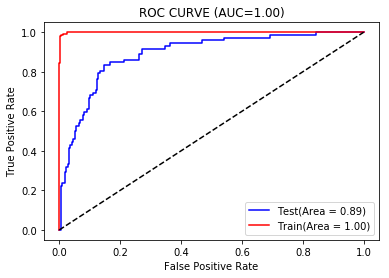

In [32]:
from sklearn.metrics import roc_curve,auc
FPR1,TPR1,threshold1=roc_curve(y_train,y_pred_train,pos_label=1)#测试集的ROC
FPR,TPR,threshold=roc_curve(y_test,y_pred,pos_label=1)#训练集的ROC

#ROC曲线绘制---不同模型的ROC，同一个模型不同数据集下的ROC均可实现
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(auc_score_train))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot(FPR,TPR,color='blue',label='Test(Area = %0.2f)' % auc_score_test)#测试集的ROC
plt.plot(FPR1,TPR1,color='red',label='Train(Area = %0.2f)' % auc_score_train)#训练集的ROC
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.legend(loc="lower right")
#plt.savefig("RF ROC.jpg",dpi=1000) #可以保存图
plt.show()

In [33]:
#保存模型
import joblib
joblib.dump(classifier, "RF 最终6变量 脓毒症模型.m")

['RF 最终6变量 脓毒症模型.m']